# **Natural Language Processing**

---


## *Practice 3 - Text representation*

### Objectives of this practice:


1.  Learn how to represent text for subsequent computational processing. In other words, how to generate features from text.

#### Vocabulary and Frequencies

The simplest representation is to know the vocabulary of the text to be processed and the frequencies of its words.


In [30]:
import spacy
from nltk.probability import FreqDist

spacy.cli.download("es_core_news_sm")
nlp = spacy.load("es_core_news_sm")

with open('/content/drive/MyDrive/NLP/Federico_Garcia_Lorca/Romancero_gitano.txt', 'r') as file:
  text_content = file.read()

preprocess_doc = nlp(text_content)

# Standard loop
tokens = []
for token in preprocess_doc:
  tokens.append(token.text)

# Standard loop avoiding periods
tokens = []
tokens_append = tokens.append
for token in preprocess_doc:
  tokens_append(token.text)

# Inline loop
tokens = [token.text for token in preprocess_doc]

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


7938
2113
2113
['\ufeffThe', '\n    \n', 'is', 'for', 'use', 'anyone', 'anywhere', 'most', 'other', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'give', 'away', 're-use', 'under', 'terms', 'License', 'included', 'online', 'www.gutenberg.org', 'If', 'not', 'will', 'have', 'to', 'check', 'laws', 'country', 'where', 'before', 'using', 'Title', 'Author', 'Release', 'date', 'January', '2024', '[', '#', '72665', ']', 'Language', 'Spanish', 'Original', 'publication', 'Credits', 'Ramón', 'Pajares', 'Box', 'file', 'was', 'produced', 'from', 'images', 'generously', 'made', 'available', 'by', 'Digital', 'Hispánica', '/', 'España', 'START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'NOTA', 'TRANSCRIPCIÓN', 'cursivas', 'muestran', 'subrayados', 'errores', 'imprenta', 'corregidos', 'ortografía', 'puntuación', 'originales', 'conservadas', 'excepciones', '111', 'horzas', '141', 'llemas', 'páginas', 'eliminadas', '\n\n\n\n\n\n  ', 'FEDERICO', 'GARCÍA', 'LO

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

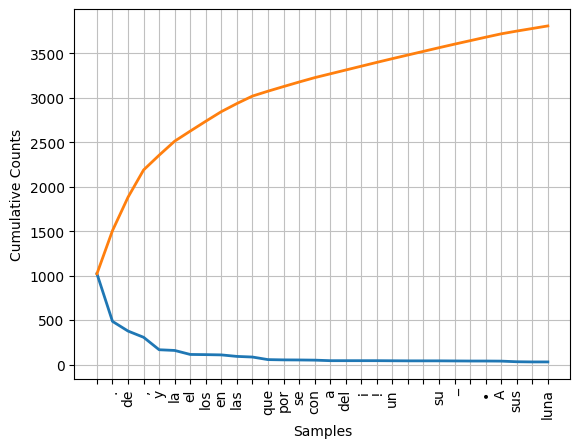

In [31]:
book_fdist = FreqDist(tokens)

# Show document statistics

print(book_fdist.N())  # Number of tokens
print(book_fdist.B())  # Number of unique tokens --> vocabulary.
print(len(book_fdist))  # Number of unique tokens --> vocabulary.
print(book_fdist.hapaxes())  # List of tokens with frequency 1.

# Show the 30 most frequent tokens along with their frequency of appearance.
print(
    "\n#Show the 30 most frequent tokens along with their frequency of appearance.\n"
)
most_common = book_fdist.most_common(30)
print("\n".join([f"{t[0], t[1]}" for t in most_common]))

book_fdist.plot(30, cumulative=False)
book_fdist.plot(30, cumulative=True)




#Show the 30 most frequent tokens in lowercase.

('\n    ', 1021)
('.', 485)
('de', 399)
(',', 306)
('la', 192)
('y', 191)
('el', 149)
('en', 126)
('los', 121)
('las', 102)
('\n\n      ', 84)
('a', 81)
('por', 67)
('con', 56)
('que', 56)
('se', 54)
('un', 53)
('su', 47)
('del', 44)
('¡', 43)
('!', 43)
('\n\n', 41)
('\n\n    ', 41)
('_', 40)
('\n\n\n\n\n', 39)
('•', 39)
('sus', 35)
('luna', 33)
('\n\n  ', 29)
('una', 28)


<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

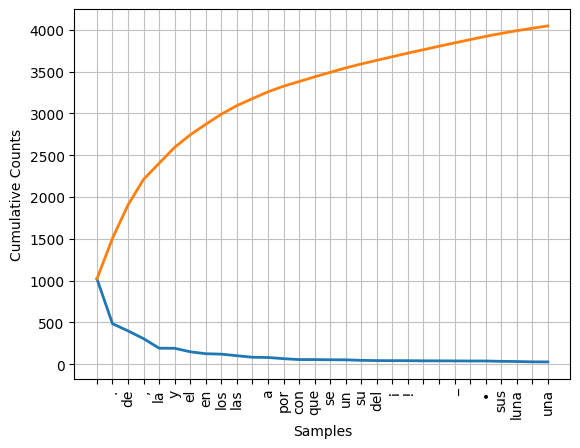

In [32]:
# Show the 30 most frequent tokens in lowercase.
print("\n#Show the 30 most frequent tokens in lowercase.\n")
tokens = [token.text.lower() for token in preprocess_doc]
book_fdist = FreqDist(tokens)
most_common = book_fdist.most_common(30)
print("\n".join([f"{t[0], t[1]}" for t in most_common]))

book_fdist.plot(30, cumulative=False)
book_fdist.plot(30, cumulative=True)


Show the 30 most frequent tokens in lowercase without stopwords or punctuation

('luna', 33)
('san', 26)
('noche', 26)
('verde', 26)
('agua', 25)
('gitanos', 18)
('ojos', 17)
('romance', 15)
('aire', 15)
('caballo', 14)
('niño', 12)
('preciosa', 12)
('mar', 12)
('ciudad', 12)
('monte', 11)
('pena', 11)
('cielo', 10)
('viento', 10)
('sangre', 10)
('oh', 10)
('gabriel', 10)
('camborio', 10)
('the', 9)
('ay', 9)
('rumor', 9)
('josé', 9)
('pedro', 9)
('olalla', 9)
('thamár', 9)
('viene', 8)


<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

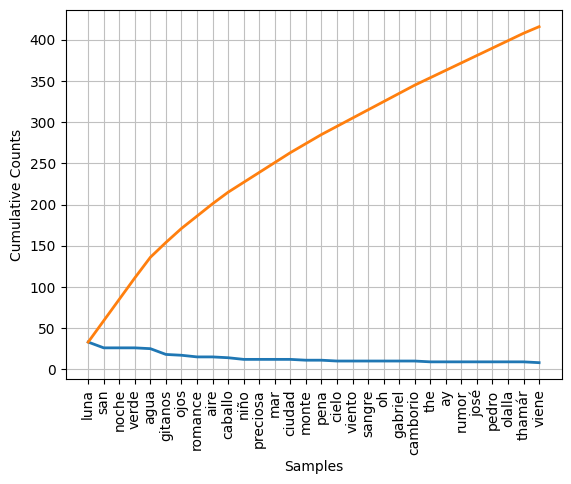

In [33]:
# Show the 30 most frequent tokens in lowercase without stopwords or punctuation marks.
print(
    "\nShow the 30 most frequent tokens in lowercase without stopwords or punctuation\n"
)
tokens = []
tokens = [
    token.text.lower()
    for token in preprocess_doc
    if not (token.is_stop or token.is_punct or token.is_quote or "\n" in token.text)
]
book_fdist = FreqDist(tokens)
most_common = book_fdist.most_common(30)
print("\n".join([f"{t[0], t[1]}" for t in most_common]))

book_fdist.plot(30, cumulative=False)
book_fdist.plot(30, cumulative=True)

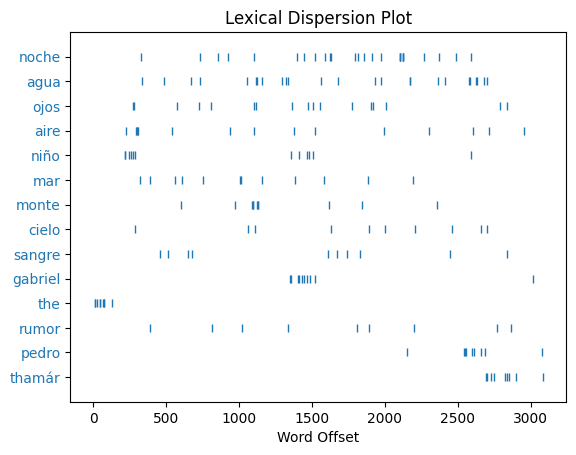

In [34]:
# Dispersion diagram
from nltk.text import Text

Text(tokens).dispersion_plot([t[0] for t in most_common[2:30:2]])

In this way, we can already get an idea of what our text may be about and what words it contains.

### Representation by Vector Space

Machine learning algorithms need a vector space representation. In data types like images, this representation is direct. However, when we work with language (text), we need to construct it. The first option would be to represent the words as a sequence of bits, but it is not feasible because:

*   It does not represent the meaning.
*   The representation depends on the length of the words.

Let's look at feasible representations below.

#### *One-hot* Representation

The vocabulary (unique words) is taken, and each word will be represented by a vector of length equal to that of the vocabulary with all zero values, but with only one value at 1 that represents that word in the vocabulary.

In [ ]:
ex_doc = [
    "el perro de san roque",
    "san roque tiene un perro",
    "el perro no tiene rabo",
]

docs_tokens = [nlp(doc) for doc in ex_doc]
ex_tokens = []
ex_tokens_append = ex_tokens.append
for doc_tokens in docs_tokens:
    for token in doc_tokens:
        ex_tokens_append(token.text)

ex_tokens_freq = FreqDist(ex_tokens)
ex_tokens_vocab = list(ex_tokens_freq)
print(ex_tokens_vocab)

['perro', 'el', 'san', 'roque', 'tiene', 'de', 'un', 'no', 'rabo']


In [ ]:
def vocab_build(docs):
    """
    Args:
      docs: list of documents processed with Spacy.
    Returns:
      vocab: list of tokens from the vocabulary.
    """
    vocab = {}
    vocab_counter = 0
    for doc_processed in docs_processed:
        for token in doc_processed:
            if token.text not in vocab:
                vocab[token.text] = vocab_counter
                vocab_counter += 1
    return vocab


nlp = spacy.load("es_core_news_sm")
docs_processed = [nlp(doc) for doc in ex_doc]

vocabulario = vocab_build(docs_processed)
print(vocabulario)

{'el': 0, 'perro': 1, 'de': 2, 'san': 3, 'roque': 4, 'tiene': 5, 'un': 6, 'no': 7, 'rabo': 8}


In [ ]:
def get_onehot_vector(doc_string_tokens, vocab):
    """
    Args:
      doc_string_tokens: list of tokens from the document.
      vocab: list of tokens from the vocabulary.
    Returns:
      onehot_encoded: list of one-hot vectors.
    """
    onehot_encoded = []
    onehote_encoded_append = onehot_encoded.append
    for token in doc_string_tokens:
        temp = [0] * len(vocab)
        if token in vocab:
            temp[vocab[token]] = 1
        onehote_encoded_append(temp)

    return onehot_encoded

In [ ]:
print(docs_processed[1])
tokens_docs_preprocessed = [token.text for token in docs_processed[1]]
onehot_one_document = get_onehot_vector(tokens_docs_preprocessed, vocabulario)
onehot_one_document

san roque tiene un perro


[[0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0]]

The previous process can also be done more directly with the OneHotEncoder class from the Scikit-learn library. Let's see.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

tokens_docs = []
tokens_docs_append = tokens_docs.append
for doc_processed in docs_processed:
    tokens_docs_append([token.text for token in doc_processed])

print(tokens_docs)
onehot_encoder = OneHotEncoder()

onehot_encoder_matrix = onehot_encoder.fit_transform(tokens_docs)
print(f"One hot representation matrix:\n{onehot_encoder_matrix.toarray()}")
onehot_encoder.get_feature_names_out()

[['el', 'perro', 'de', 'san', 'roque'], ['san', 'roque', 'tiene', 'un', 'perro'], ['el', 'perro', 'no', 'tiene', 'rabo']]
One hot representation matrix:
[[1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.]]


array(['x0_el', 'x0_san', 'x1_perro', 'x1_roque', 'x2_de', 'x2_no',
       'x2_tiene', 'x3_san', 'x3_tiene', 'x3_un', 'x4_perro', 'x4_rabo',
       'x4_roque'], dtype=object)

### **Representation by Vector Space - Bag of Words (BoW)**

The *one-hot* representation is limited by:

*   A sparse representation: most of the values are zero, they do not provide information, wasting space in memory and on disk, if stored.
*   Does not represent meaning.

A concentrated representation that integrates the representation of meaning is necessary. This is provided by the representation by **vector space**. It consists of representing words and documents by vectors, constituting tensors (two dimensions: matrix). In the field of NLP, this is known as **Bag of Words**:

*   Allows a concentrated representation.
*   Fixes the representation to the number of documents and the size of the vocabulary. It does not depend on the length of each document.
*   Minimum representation of meaning, since this is only represented in statistical terms.
*   It is usually a supervised representation dependent on the training set, which makes it difficult to represent out-of-vocabulary (OOV) words.

#### Binary Vector Space

The *scikit-learn* library provides a series of classes to build this type of vector spaces. This family of classes is known as ***Vectorizers***. The variety of names depends on the statistic used to calculate the value of the characteristic (unigram, bigram...) or weight.

#####CountVectorizer

The simplest class is ***CountVectorizer***, which allows you to build a binary or frequency-based vector space.

**Note**: First, we define a tokenization function to use Spacy's tokenization in Spanish. In English, unless a special tokenization was needed, it would not be necessary.

In [ ]:
def personal_tokenization(text_to_tokenize):
    """
    Args:
      text_to_tokenize: string of text to tokenize.
    Returns:
      tokens: list of tokens.
    """
    nlp = spacy.load("es_core_news_sm")
    text_processed = nlp(text_to_tokenize)
    tokens = [token.text for token in text_processed]
    docs_processed = [nlp(doc) for doc in ex_doc]
    return tokens

In [ ]:
ex_doc = [
    "el perro de san roque",
    "san roque tiene un perro",
    "el perro no tiene rabo",
]
# Test of the tokenization
print(personal_tokenization(ex_doc[0]))

['el', 'perro', 'de', 'san', 'roque']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(binary=True, tokenizer=personal_tokenization)
bow_rep_binario = count_vectorizer.fit_transform(ex_doc)

# Vocabulary
print(f'Vocabulary {count_vectorizer.get_feature_names_out()}')
print(f'Vocabulary {count_vectorizer.vocabulary_}')

# Vector per document
print(f'Representation of document 1: {ex_doc[1]} {bow_rep_binario[1].toarray()}')

# Document by term (vocabulary) matrix
print(f'Document by term (vocabulary) matrix\n{bow_rep_binario.toarray()}')

# Using the same vocabulary, representation of a new document.
new_doc = ["ramón ramirez le cortó el rabo al perro"]
bow_rep_binario_new = count_vectorizer.transform(new_doc)
print(
    f'Representation of the new document: {new_doc[0]} {bow_rep_binario_new.toarray()}'
)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Vocabulary ['de' 'el' 'no' 'perro' 'rabo' 'roque' 'san' 'tiene' 'un']
Vocabulary {'el': 1, 'perro': 3, 'de': 0, 'san': 6, 'roque': 5, 'tiene': 7, 'un': 8, 'no': 2, 'rabo': 4}
Representation of document 1: san roque tiene un perro [[0 0 0 1 0 1 1 1 1]]
Document by term (vocabulary) matrix
[[1 1 0 1 0 1 1 0 0]
 [0 0 0 1 0 1 1 1 1]
 [0 1 1 1 1 0 0 1 0]]
Representation of the new document: ramón ramirez le cortó el rabo al perro [[0 1 0 1 1 0 0 0 0]]


##### **Now with frequencies**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(tokenizer=personal_tokenization)
bow_rep_binario = count_vectorizer.fit_transform(ex_doc)

# Vocabulary
print(f'Vocabulary {count_vectorizer.get_feature_names_out()}')
print(f'Vocabulary {count_vectorizer.vocabulary_}')

# Vector per document
print(f'Representation of document 1: {ex_doc[1]} {bow_rep_binario[1].toarray()}')

# Document by term (vocabulary) matrix
print(f'Document by term (vocabulary) matrix\n{bow_rep_binario.toarray()}')

# Using the same vocabulary, representation of a new document.
new_doc = ["ramón ramirez le cortó el rabo al perro"]
bow_rep_binario_new = count_vectorizer.transform(new_doc)
print(
    f'Representation of the new document: {new_doc[0]} {bow_rep_binario_new.toarray()}'
)

Vocabulary ['de' 'el' 'no' 'perro' 'rabo' 'roque' 'san' 'tiene' 'un']
Vocabulary {'el': 1, 'perro': 3, 'de': 0, 'san': 6, 'roque': 5, 'tiene': 7, 'un': 8, 'no': 2, 'rabo': 4}
Representation of document 1: san roque tiene un perro [[0 0 0 1 0 1 1 1 1]]
Document by term (vocabulary) matrix
[[1 1 0 1 0 1 1 0 0]
 [0 0 0 1 0 1 1 1 1]
 [0 1 1 1 1 0 0 1 0]]
Representation of the new document: ramón ramirez le cortó el rabo al perro [[0 1 0 1 1 0 0 0 0]]


#### **Now with TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(tokenizer=personal_tokenization)
bow_rep = tfidf_vectorizer.fit_transform(ex_doc)

# Vocabulary
print(f'Vocabulary {tfidf_vectorizer.get_feature_names_out()}')
print(f'Values of idf of the vocabulary {tfidf_vectorizer.idf_}')

# Vector per document
print(f'Representation of document 1: {ex_doc[1]} {bow_rep[1].toarray()}')

# Document by term (vocabulary) matrix
print(f'Document by term (vocabulary) matrix\n{bow_rep.toarray()}')

# Using the same vocabulary, representation of a new document.
new_doc = ["ramón ramirez le cortó el rabo al perro"]
bow_rep_new = tfidf_vectorizer.transform(new_doc)
print(f'Representation of the new document: {new_doc[0]} {bow_rep_new.toarray()}')

Vocabulary ['de' 'el' 'no' 'perro' 'rabo' 'roque' 'san' 'tiene' 'un']
Values of idf of the vocabulary [1.69314718 1.28768207 1.69314718 1.         1.69314718 1.28768207
 1.28768207 1.28768207 1.69314718]
Representation of document 1: san roque tiene un perro [[0.         0.         0.         0.33631504 0.         0.43306685
  0.43306685 0.43306685 0.56943086]]
Document by term (vocabulary) matrix
[[0.56943086 0.43306685 0.         0.33631504 0.         0.43306685
  0.43306685 0.         0.        ]
 [0.         0.         0.         0.33631504 0.         0.43306685
  0.43306685 0.43306685 0.56943086]
 [0.         0.40619178 0.53409337 0.31544415 0.53409337 0.
  0.         0.40619178 0.        ]]
Representation of the new document: ramón ramirez le cortó el rabo al perro [[0.         0.54783215 0.         0.42544054 0.72033345 0.
  0.         0.         0.        ]]


### Unigrams vs N-grams

In the previous examples, the unigram (words or tokens) has been used, but pairs, triplets, or n-pairings of words could be used. Let's see an example that builds a vector space of unigrams, bigrams, and trigrams. You should look at the *ngram_range* parameter.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(tokenizer=personal_tokenization, ngram_range=(1, 3))
bow_rep = tfidf_vectorizer.fit_transform(ex_doc)

# Vocabulary
print(f'Vocabulary {tfidf_vectorizer.get_feature_names_out()}')
print(f'Values of idf of the vocabulary {tfidf_vectorizer.idf_}')

# Vector per document
print(f'Representation of document 1: {ex_doc[1]} {bow_rep[1].toarray()}')

# Document by term (vocabulary) matrix
print(f'Document by term (vocabulary) matrix\n{bow_rep.toarray()}')

# Using the same vocabulary, representation of a new document.
new_doc = ["ramón ramirez le cortó el rabo al perro"]
bow_rep_new = tfidf_vectorizer.transform(new_doc)
print(f'Representation of the new document: {new_doc[0]} {bow_rep_new.toarray()}')

Vocabulary ['de' 'de san' 'de san roque' 'el' 'el perro' 'el perro de' 'el perro no'
 'no' 'no tiene' 'no tiene rabo' 'perro' 'perro de' 'perro de san'
 'perro no' 'perro no tiene' 'rabo' 'roque' 'roque tiene' 'roque tiene un'
 'san' 'san roque' 'san roque tiene' 'tiene' 'tiene rabo' 'tiene un'
 'tiene un perro' 'un' 'un perro']
Values of idf of the vocabulary [1.69314718 1.69314718 1.69314718 1.28768207 1.28768207 1.69314718
 1.69314718 1.69314718 1.69314718 1.69314718 1.         1.69314718
 1.69314718 1.69314718 1.69314718 1.69314718 1.28768207 1.69314718
 1.69314718 1.28768207 1.28768207 1.69314718 1.28768207 1.69314718
 1.69314718 1.69314718 1.69314718 1.69314718]
Representation of document 1: san roque tiene un perro [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.19000377 0.
  0.         0.         0.         0.         0.24466445 0.32170435
  0.32170435 0.24466445 0.24466445 0.32170435 0.24466445 0.
  0.32170435 0.32170

### **Semantic Representation**

According to the distributional hypothesis of language, we know that the meaning of a word depends on its context, that is, the words that surround it.

Let's see how we can study the context of a word by returning to our example with the novel Bailén.

In [ ]:
from nltk.text import Text
from nltk.probability import FreqDist

nlp = spacy.load("es_core_news_sm")

with open('/content/drive/MyDrive/NLP/benito_perez_galdos_epi_nacionales_bailen.txt', 'r') as file:
    text_content = file.read()

preprocess_doc = nlp(text_content)

tokens = []
# Tokenize eliminating punctuation marks, quotes, and carriage returns. Stop words are kept.

tokens_wout_stop = [
    token.text.lower()
    for token in preprocess_doc
    if not (token.is_stop or token.is_punct or token.is_quote or "\n" in token.text)
]
tokens_w_stop = [
    token.text.lower()
    for token in preprocess_doc
    if not (token.is_punct or token.is_quote or "\n" in token.text)
]
preprocess_text = Text(tokens_w_stop)
freq_text = FreqDist(tokens_wout_stop)
print(f'The 10 most frequent words:\n{freq_text.most_common(10)}')

preprocess_text.concordance('franceses')
preprocess_text.concordance('españa')
preprocess_text.concordance('general')

The 10 most frequent words:
[('d.', 183), ('franceses', 118), ('casa', 102), ('santorcaz', 90), ('ejército', 90), ('españa', 79), ('inés', 72), ('general', 71), ('fué', 70), ('camino', 68)]
Displaying 25 of 118 matches:
sted nos habla españa echará a los franceses aunque los manden todos los empera
torcaz-- dijo usted que cuatro mil franceses atacaron a la bayoneta a diez mil 
e murat es que simpatizaba con los franceses --no no y quien lo dijere miente--
no dicen que mataste mas de veinte franceses ya me contarás tus hazañas picarón
n ustedes el susto que pasarán los franceses hay que guardar el secreto mucho c
e andalucía vendrá a la mancha los franceses irán a batirlos dejando libre a ma
roceder hacía el tajo viéndose los franceses atacados por un lado y otro por fu
alas con saliva les destruirán los franceses --¿y todo lo que sabe usted se red
ar que no podemos batirnos con los franceses qué importa que se armen multitud 
disimular su alegría el odio a los franceses no era odio era

#### **Similar Words**

With the calculation of similar contexts, it is also possible to obtain those words that appear in similar contexts, and therefore are similar. Let's see.

In [ ]:
preprocess_text.similar('franceses', 10)
preprocess_text.similar('españa', 10)
preprocess_text.similar('general', 10)

españoles demás que ojos soldados hombres cañones generales rusos
enemigos
bailén que santorcaz dios mí la todo esto improviso allí
ejército día camino pueblo frente fin destacamento hombre que
emperador


#### **Collocations**

Another way to find contexts is the concept of collocations. Collocations are sets of words that often appear together, and therefore could be considered multi-words. NLTK uses *pointwise mutual information* (PMI) for its calculation. Let's see.

In [ ]:
# The calculation of collocations must be done by eliminating stopwords, since
# they are not relevant in the determination of this type of multi-words.

from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Collocations of two words (bigrams)
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens_wout_stop)
finder.apply_freq_filter(3)
col_bigrams = finder.nbest(bigram_measures.pmi, 10)
print('Collocations of two words: ' + '\n'.join(str(t) for t in col_bigrams))

from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder

# Collocations of three words (trigrams)
trigram_measures = TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(tokens_wout_stop)
finder.apply_freq_filter(3)
col_trigrams = finder.nbest(bigram_measures.pmi, 10)
print('Collocations of three words: ' + '\n'.join(str(t) for t in col_trigrams))

Collocations of two words: ('gaceta', 'ministerial')
('guardias', 'corps')
('gregorio', 'cuesta')
('duque', 'berg')
('sociedades', 'secretas')
('chocolate', 'bollos')
('malvado', 'desgraciado')
('subsiguiente', 'matrimonio')
('bala', 'rasa')
('virgen', 'araceli')
Collocations of three words: ('nota', 'pie', 'página')
('viva', 'fernando', 'vii')
('cortar', 'paso', 'sierra')
('d.', 'gregorio', 'cuesta')
('sra.', 'marquesa', 'leiva')
('tropas', 'san', 'roque')
('d.', 'pedro', 'velarde')
('d.', 'santiago', 'fernández')
('sr.', 'd.', 'francisco')
('señora', 'madre', 'quiero')


### Semantic Representation by Predictive Models

The previous methods of semantic representation by contexts are not based on learning objectives, but on the statistical analysis of the text.

The *word embeddings* models are based on predictive models, particularly on neural networks.

Among the best-known models is Word2Vect. This allows us to build unsupervised semantic representations of words. These representations are static, so that all the meanings of a word are embedded in a single vector.

These sets of embeddings are usually already trained. In our case, we are going to use a set of word vectors in Spanish trained with the Word2Vect CBOW algorithm (source: https://zenodo.org/records/1410403, https://github.com/aitoralmeida/spanish_word2vec?tab=readme-ov-file). To work with semantic representation, we are going to work with the Gensim library, specialized in working with unsupervised learning (*topic modeling* and semantic representation).

Word2Vec vectors: https://drive.google.com/file/d/1-Pg_NJvYoKofcpD4_lNQp4PHwaOr6kEN/view?usp=drive_link

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
import shutil

w2v_model = KeyedVectors.load_word2vec_format(
    '/content/drive/MyDrive/NLP/wiki.es.vec'
)

In [ ]:
str_sim = "\n".join([str(t) for t in w2v_model.most_similar("franceses")])
print(f'Words most similar to franceses: \n{str_sim}')

str_sim = "\n".join([str(t) for t in w2v_model.most_similar('españa')])
print(f'\nWords most similar to España: \n{str_sim}')

str_sim = "\n".join([str(t) for t in w2v_model.most_similar('general')])
print(f'\nWords most similar to general: \n{str_sim}')

str_sim = "\n".join([str(t) for t in w2v_model.most_similar('bailen')])
print(f'\nWords most similar to bailén: \n{str_sim}')

str_sim = "\n".join([str(t) for t in w2v_model.most_similar('batalla')])
print(f'\nWords most similar to batalla: \n{str_sim}')

Words most similar to franceses: 
('anglofranceses', 0.8233381509780884)
('franceses—', 0.8007181882858276)
('franceses»', 0.7960160970687866)
('italofranceses', 0.7660411596298218)
('ingleses', 0.759066104888916)
('francéses', 0.7548388838768005)
('francesas', 0.7342821955680847)
('británicos', 0.7015264630317688)
('antifranceses', 0.698003888130188)
('francesa–', 0.6860604286193848)

Words most similar to España: 
('españaa', 0.8506016731262207)
('españa…', 0.830617368221283)
('españay', 0.8187254071235657)
('españa\u200e', 0.79819655418396)
('españa\xa0', 0.7978416085243225)
('españa,y', 0.7960103750228882)
(',españa', 0.7952966094017029)
('españa,', 0.7833097577095032)
('españaes', 0.7806222438812256)
('españa#el', 0.7751614451408386)

Words most similar to general: 
(',general', 0.7558594942092896)
('general…', 0.7276251912117004)
('°general', 0.7010689973831177)
('del\xa0general', 0.6945855021476746)
('eneral', 0.6903788447380066)
('general,', 0.6856583952903748)
('¡general', 0.6

#### ***Generating Our Own Embeddings***

We may need to generate our own embeddings. The Gensim library makes it very easy for us.

In [ ]:
from gensim.models import FastText, Word2Vec

preprocess_doc = nlp(text_content)
bailen_sentences = []
bailen_sentences_append = bailen_sentences.append
for s in preprocess_doc.sents:
    sentence = [token.text.encode('utf-8') for token in s]
    bailen_sentences_append(sentence)


print(len(bailen_sentences))


w2v_model_cbow = Word2Vec(
    bailen_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0
)
vectors = w2v_model_cbow.wv
print(f'Number of words: {len(vectors)}')
print(f'Some of them: {list(vectors.key_to_index)[100:110]}')
print(w2v_model['franceses'])


str_sim = "\n".join([str(t) for t in vectors.most_similar(["franceses".encode('utf-8')])])
print(f'Words most similar to franceses: \n{str_sim}')

str_sim = "\n".join([str(t) for t in vectors.most_similar(['españa'.encode('utf-8')])])
print(f'\nWords most similar to España: \n{str_sim}')

str_sim = "\n".join([str(t) for t in vectors.most_similar(['general'.encode('utf-8')])])
print(f'\nWords most similar to general: \n{str_sim}')

str_sim = "\n".join([str(t) for t in vectors.most_similar(['bailen'.encode('utf-8')])])
print(f'\nWords most similar to bailén: \n{str_sim}')

str_sim = "\n".join([str(t) for t in vectors.most_similar(['batalla'.encode('utf-8')])])
print(f'\nWords most similar to batalla: \n{str_sim}')

2599
Number of words: 11483
Some of them: [b'fu\xc3\xa9', b'En', b'estaba', b'nosotros', b'vez', b'aunque', b'pues', b'guerra', b'as\xc3\xad', b'Diego']
[-0.14804   -0.18702   -0.023578  -0.10328   -0.11172    0.154
 -0.024626   0.20981   -0.48662    0.11559   -0.03081   -0.44682
 -0.12723    0.14277    0.11107   -0.060608  -0.22568    0.29584
 -0.16975   -0.011008  -0.20853   -0.1483     0.17432    0.05252
  0.046022  -0.12102    0.10065   -0.54384    0.17522    0.071212
  0.16557    0.10732   -0.098168  -0.090783   0.14892    0.065157
  0.2009     0.11712   -0.11051    0.30639    0.066285   0.16351
  0.26596    0.44723    0.49734   -0.29639    0.112     -0.26829
 -0.060687  -0.26613    0.3629    -0.22026   -0.12355    0.28491
  0.39566    0.47028    0.035227   0.21122   -0.1016    -0.2849
 -0.11712    0.19675    0.32159   -0.1115    -0.014475  -0.087547
  0.25604    0.23895   -0.55932   -0.22619   -0.05775   -0.19099
 -0.15016    0.38366    0.071454   0.17723   -0.23235   -0.15646
  

## Exercises

The exercises must be carried out on this *notebook*, and must be delivered through PLATEA before the deadline indicated.

All the works in .txt file should be downloaded from the [Project Gutemberg](https://www.gutenberg.org/browse/languages/es) of:

*   Miguel de Cervantes.
*   Miguel de Unamuno.
*   Benito Pérez Galdós.
*   Manuel Azaña.
*   Pio Baroja.
*   Federico García Lorca.
*   Antonio Machado.

I have decided thtat I will chose **from 2 to 3 books** of each author to represent him.

## Exercise 1
What are the contexts of the word Spain in the works of Manuel Azaña?

In [1]:
from nltk.text import Text
import spacy
from nltk.probability import FreqDist

nlp = spacy.load("es_core_news_sm")

with open('/content/drive/MyDrive/NLP/Manuel_Azana/Manuel_Azana_BibliaTomo2.txt', 'r') as file: text_content = file.read()

preprocess_doc = nlp(text_content)

tokens = []
# Tokenize eliminating punctuation marks, quotes, and carriage returns. Stop words are kept.

tokens_wout_stop = [
    token.text.lower()
    for token in preprocess_doc
    if not (token.is_stop or token.is_punct or token.is_quote or "\n" in token.text)
]
tokens_w_stop = [
    token.text.lower()
    for token in preprocess_doc
    if not (token.is_punct or token.is_quote or "\n" in token.text)
]
preprocess_text = Text(tokens_w_stop)
freq_text = FreqDist(tokens_wout_stop)
print(f'The 10 most frequent words:\n{freq_text.most_common(10)}')

preprocess_text.concordance('españa')


The 10 most frequent words:
[('caballo', 123), ('camino', 120), ('españa', 116), ('antonio', 104), ('ciudad', 99), ('hombre', 92), ('casa', 91), ('guía', 86), ('fué', 79), ('posada', 78)]
Displaying 25 of 116 matches:
ect gutenberg ebook of la biblia en españa tomo ii de 3 this ebook is for the 
using this ebook title la biblia en españa tomo ii de 3 author george borrow t
roject gutenberg ebook la biblia en españa tomo ii de 3 note project gutenberg
 granada viajes borrow la biblia en españa trad del inglés por m. azaña la bib
el inglés por m. azaña la biblia en españa por j. borrow traducción directa de
andeses cristianos —las llanuras de españa —los catalanes —la poza fatal —vall
                   301 la biblia en españa capítulo xix llegada a madrid —marí
or altura durante mi permanencia en españa encontré en esta mujer un amigo fir
as humildes páginas de la biblia en españa maría díaz era natural de villaseca
lópez el mejor pintor de la moderna españa tal era maría díaz quien con

In [2]:
preprocess_text.similar('españa', 10)

usted galicia que madrid santiago todo oviedo antonio ella ellos


## Exercise 2

An exploratory analysis of each of the authors must be carried out, that is:

*   Vocabulary construction.
*   Vocabulary size --> without empty words or punctuation marks.

For all authors:

*   Join all the texts and preprocess them: eliminate stopwords and punctuation marks.
*   Construction of BoW by frequency. Show a portion (20 most frequent tokens) of the matrix.
*   Construction of BoW TF-IDF with unigrams. Show a portion (20 most frequent tokens) of the matrix and compare it with the previous one. Show the idf value of these words and interpret their value.

In [27]:
# In case if a text length exeeds maximum - I don't encrease the limit, but just dont use some of the documents to safe time.

file_paths_Machado=[
  '/content/drive/MyDrive/NLP/Antonio_Machado/Paginas_escogidas.txt',
  '/content/drive/MyDrive/NLP/Antonio_Machado/Poesias_completas.txt'
]

file_paths_Galdos = [
    # '/content/drive/MyDrive/NLP/Benito_Perez_Galdos/El _9_de_marzo_y_el_2_de_mayo.txt',
    '/content/drive/MyDrive/NLP/Benito_Perez_Galdos/El_amigo_Manso.txt',
    '/content/drive/MyDrive/NLP/Benito_Perez_Galdos/Los_apostolicos.txt'
]

file_paths_Lorca =[
    '/content/drive/MyDrive/NLP/Federico_Garcia_Lorca/Romancero_gitano.txt'
]

file_paths_Azana =[
    # '/content/drive/MyDrive/NLP/Manuel_Azana/Manuel_Azana_BibliaTomo1.txt',
    '/content/drive/MyDrive/NLP/Manuel_Azana/Manuel_Azana_BibliaTomo2.txt',
    '/content/drive/MyDrive/NLP/Manuel_Azana/Manuel_Azana_BibliaTomo3.txt'
]

file_paths_Cervantes = [
    # '/content/drive/MyDrive/NLP/Miguel_de_Cervantes/Don_Quijote.txt',
    '/content/drive/MyDrive/NLP/Miguel_de_Cervantes/Los_entremeses.txt',
    # '/content/drive/MyDrive/NLP/Miguel_de_Cervantes/Novelas_ejemplares.txt',
    '/content/drive/MyDrive/NLP/Miguel_de_Cervantes/Novelas_y_teatro.txt'

]

file_paths_Unamuno = [
    '/content/drive/MyDrive/NLP/Miguel_de_Unamuno/Amor_y_Pedagogia.txt',
    '/content/drive/MyDrive/NLP/Miguel_de_Unamuno/Del_sentimiento_tragico_de_la_vida.txt'
    # '/content/drive/MyDrive/NLP/Miguel_de_Unamuno/Una_Historia_de_Pasion.txt'
]


file_paths_Baroja = [
  '/content/drive/MyDrive/NLP/Pio_Baroja/El_amor_el_dandysmo_y_la_intriga.txt',
  '/content/drive/MyDrive/NLP/Pio_Baroja/Los Caminos del Mundo.txt'
  # '/content/drive/MyDrive/NLP/Pio_Baroja/Los_Caudillos_de_1830.txt'

 ]

### Part 1
Vocabulary construction.
Vocabulary size

In [4]:
def join_text(file_paths):

  nlp = spacy.load("es_core_news_sm")

  text_content = ''
  for file_path in file_paths:
    with open(file_path, 'r') as file:
      text_content+= file.read()
  preprocess_doc = nlp(text_content)

  tokens = []
  tokens = [
    token.text.lower()
    for token in preprocess_doc
    if not (token.is_stop or token.is_punct or token.is_quote or "\n" in token.text)
  ]

  return tokens

In [5]:
import spacy
from nltk.probability import FreqDist

spacy.cli.download("es_core_news_sm")
nlp = spacy.load("es_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
def vocs_and_freq(file_paths):
  tokens = join_text(file_paths)
  book_fdist = FreqDist(tokens)
  print(f'Number of tokens: {book_fdist.N()}')  # Number of tokens
  print(f'Number of unique tokens (vocabulary): {len(book_fdist)}')  # Number of unique tokens --> vocabulary.

In [9]:
nlp.max_length = 100000000

In [7]:
vocs_and_freq(file_paths_Machado)

Number of tokens: 23526
Number of unique tokens (vocabulary): 6677


In [12]:
vocs_and_freq(file_paths_Galdos)

Number of tokens: 72548
Number of unique tokens (vocabulary): 20890


In [13]:
vocs_and_freq(file_paths_Lorca)

Number of tokens: 3091
Number of unique tokens (vocabulary): 1708


In [16]:
vocs_and_freq(file_paths_Azana)

Number of tokens: 58326
Number of unique tokens (vocabulary): 16578


In [23]:
vocs_and_freq(file_paths_Cervantes)

Number of tokens: 41066
Number of unique tokens (vocabulary): 12114


In [24]:
print(nlp.max_length)


# I don't know why it doesn't work. It did just fine yesterday. The number is changed but the error occures if file length is more than 1 000 000

100000000


In [28]:
vocs_and_freq(file_paths_Unamuno)

Number of tokens: 60756
Number of unique tokens (vocabulary): 16509


In [29]:
vocs_and_freq(file_paths_Baroja)

Number of tokens: 61680
Number of unique tokens (vocabulary): 16449


### Part 2

For all authors:


*   Join all the texts and preprocess them: eliminate stopwords and punctuation marks.
*  Construction of BoW by frequency. Show a portion (20 most frequent tokens) of the matrix.
*   Construction of BoW TF-IDF with unigrams. Show a portion (20 most frequent tokens) of the matrix and compare it with the previous one.
*   Show the idf value of these words and interpret their value.

In [30]:
all_file_paths = file_paths_Machado + file_paths_Galdos + file_paths_Lorca + file_paths_Azana + file_paths_Cervantes + file_paths_Unamuno + file_paths_Baroja

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [32]:
stop_words_es = set(stopwords.words('spanish'))
punctuation = set(string.punctuation)

In [33]:
documents = []
for file_path in all_file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        documents.append(file.read())

In [34]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words_es and token not in punctuation]
    return " ".join(filtered_tokens)

In [35]:
preprocessed_documents = [preprocess_text(doc) for doc in documents]

In [36]:
vectorizer_count = CountVectorizer()
bow_matrix_count = vectorizer_count.fit_transform(preprocessed_documents)

token_counts = bow_matrix_count.sum(axis=0).A1
token_freq_count = dict(zip(vectorizer_count.get_feature_names_out(), token_counts))

most_common_tokens_count = sorted(token_freq_count.items(), key=lambda x: x[1], reverse=True)[:20]

print("20 most frequent tokens:")
for token, count in most_common_tokens_count:
    print(f"{token}: {count}")

20 most frequent tokens:
si: 2493
usted: 2268
dijo: 1382
tan: 1343
casa: 1311
hombre: 1311
ser: 1308
dios: 1307
dos: 1256
bien: 1252
don: 1100
vida: 1096
pues: 1043
qué: 1026
así: 939
aquí: 909
sino: 902
después: 822
mismo: 814
señor: 793


In [37]:
print(f'Vocabulary {vectorizer_count.get_feature_names_out()}')
print(f'Vocabulary {vectorizer_count.vocabulary_}')

# Document by term (vocabulary) matrix
print(f'Document by term (vocabulary) matrix\n{bow_matrix_count.toarray()}')

Vocabulary ['00' '000' '10' ... 'ὄναρ' 'ὄντως' 'ὑπόστασις']
Vocabulary {'the': 46090, 'project': 38476, 'gutenberg': 25204, 'ebook': 18613, 'of': 34315, 'páginas': 39139, 'escogidas': 20947, 'this': 46101, 'is': 28533, 'for': 23479, 'use': 47770, 'anyone': 5438, 'anywhere': 5439, 'in': 27025, 'united': 47679, 'states': 44731, 'and': 5026, 'most': 32856, 'other': 34888, 'parts': 35512, 'world': 49367, 'at': 6967, 'cost': 14015, 'with': 49359, 'almost': 4512, 'restrictions': 41517, 'whatsoever': 49346, 'you': 49482, 'may': 31530, 'copy': 13662, 'it': 28559, 'give': 24602, 'away': 7633, 'or': 34665, 're': 39824, 'under': 47634, 'terms': 45984, 'license': 29757, 'included': 27134, 'online': 34574, 'www': 49375, 'org': 34733, 'if': 26602, 'are': 6137, 'not': 33795, 'located': 30300, 'will': 49353, 'have': 25610, 'to': 46305, 'check': 11056, 'laws': 29374, 'country': 14068, 'where': 49347, 'before': 8351, 'using': 47772, 'title': 46277, 'author': 7429, 'antonio': 5380, 'machado': 30638, 'rel

In [38]:
# Construction of BoW TF-IDF with unigrams.
# Show a portion (20 most frequent tokens) of the matrix and compare it with the previous one.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
bow_rep = tfidf_vectorizer.fit_transform(preprocessed_documents)

token_tfidf = bow_rep.sum(axis=0).A1
token_freq_tfidf = dict(zip(tfidf_vectorizer.get_feature_names_out(), token_tfidf))

most_common_tokens_tfidf = sorted(token_freq_tfidf.items(), key=lambda x: x[1], reverse=True)[:20]

print("20 most frequent tokens:")
for token, tfidf in most_common_tokens_tfidf:
    print(f"{token}: {tfidf}")


20 most frequent tokens:
si: 1.9703875744984571
usted: 1.906668583603577
dos: 1.1451803752153769
tan: 1.1050371032453934
casa: 1.069566248004769
dijo: 1.0693327434394082
hombre: 0.9930142110337433
ser: 0.965435606587454
bien: 0.9619396672368795
dios: 0.923576072714325
aviraneta: 0.9231057810197991
don: 0.8763408958330403
qué: 0.8600028426680225
vida: 0.8453515812345994
pues: 0.8007449425224641
día: 0.7609324061208973
así: 0.7231190081463346
después: 0.7086924146991322
señor: 0.7079875900527887
aquí: 0.7076521636756011


In [39]:
# Vocabulary
print(f'Vocabulary {tfidf_vectorizer.get_feature_names_out()}')
print(f'Values of idf of the vocabulary {tfidf_vectorizer.idf_}')

# Document by term (vocabulary) matrix
print(f'Document by term (vocabulary) matrix\n{bow_rep.toarray()}')

Vocabulary ['00' '000' '10' ... 'ὄναρ' 'ὄντως' 'ὑπόστασις']
Values of idf of the vocabulary [2.94591015 2.02961942 1.55961579 ... 2.94591015 2.94591015 2.94591015]
Document by term (vocabulary) matrix
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00507593 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.01469076 0.         0.00388877 ... 0.00146908 0.00146908 0.00146908]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [40]:
print("\nTokens comparison:")
for i in range(20):
    token_count, count = most_common_tokens_count[i]
    token_tfidf, tfidf = most_common_tokens_tfidf[i]
    print(f" count: {token_count}\t\t TF-IDF: {token_tfidf}")



Tokens comparison:
 count: si		 TF-IDF: si
 count: usted		 TF-IDF: usted
 count: dijo		 TF-IDF: dos
 count: tan		 TF-IDF: tan
 count: casa		 TF-IDF: casa
 count: hombre		 TF-IDF: dijo
 count: ser		 TF-IDF: hombre
 count: dios		 TF-IDF: ser
 count: dos		 TF-IDF: bien
 count: bien		 TF-IDF: dios
 count: don		 TF-IDF: aviraneta
 count: vida		 TF-IDF: don
 count: pues		 TF-IDF: qué
 count: qué		 TF-IDF: vida
 count: así		 TF-IDF: pues
 count: aquí		 TF-IDF: día
 count: sino		 TF-IDF: así
 count: después		 TF-IDF: después
 count: mismo		 TF-IDF: señor
 count: señor		 TF-IDF: aquí


In [41]:
print("\nIDF frequent values:")
for token, tfidf in most_common_tokens_tfidf:
    idf = tfidf_vectorizer.idf_[tfidf_vectorizer.vocabulary_[token]]
    print(f"{token}: {idf}")


IDF frequent values:
si: 1.0
usted: 1.1541506798272583
dos: 1.0
tan: 1.0
casa: 1.0
dijo: 1.0
hombre: 1.0
ser: 1.0
bien: 1.0
dios: 1.0
aviraneta: 2.540445040947149
don: 1.0
qué: 1.0
vida: 1.0
pues: 1.0
día: 1.074107972153722
así: 1.074107972153722
después: 1.1541506798272583
señor: 1.074107972153722
aquí: 1.0


In [42]:
some_tokens = list(token_freq_tfidf.items())[1750:1800:5]
for token, tfidf in some_tokens:
    idf = tfidf_vectorizer.idf_[tfidf_vectorizer.vocabulary_[token]]
    print(f"{token}: {idf}")

_rey_: 2.9459101490553135
_rinconete: 2.9459101490553135
_romany: 2.9459101490553135
_rospeni_: 2.9459101490553135
_rías_: 2.9459101490553135
_safacoro_: 2.9459101490553135
_salamanquesas_: 2.9459101490553135
_salle: 2.9459101490553135
_sandías_: 2.9459101490553135
_saque: 2.9459101490553135


**IDF Measures how unique a word is within a collection of documents.**



*   Higher IDF = rarer word, more informative.
*   Lower IDF = common word, less informative.



If IDF = 1.0, that means that this word appears in all/most documents and is common (has low information value).

Higher IDF (IDF > 1.0) means greater rarity and information.

## Exercise 3
Indicate the best collocations of two words from the first three authors separately. Comment on the result.

First three:

- Miguel de Cervantes.
- Miguel de Unamuno.
- Benito Pérez Galdós.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words_es = set(stopwords.words('spanish'))
punctuation = set(string.punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [44]:
def preprocess_text(file_paths):
  text_content = ''
  for file_path in file_paths:
    with open(file_path, 'r') as file:
      text_content+= file.read()
  tokens = nltk.word_tokenize(text_content.lower())
  filtered_tokens = [token for token in tokens if token not in stop_words_es and token not in punctuation and token.strip()]
  return filtered_tokens

In [45]:
tokens_Galos = preprocess_text(file_paths_Galdos)
tokens_Unamuno = preprocess_text(file_paths_Unamuno)
tokens_Cervantes = preprocess_text(file_paths_Cervantes)

In [46]:
# The calculation of collocations must be done by eliminating stopwords, since
# they are not relevant in the determination of this type of multi-words.

from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

def findCollocations(tokens):

  # Collocations of two words (bigrams)
  bigram_measures = BigramAssocMeasures()
  finder = BigramCollocationFinder.from_words(tokens)
  finder.apply_freq_filter(3)
  col_bigrams = finder.nbest(bigram_measures.pmi, 10)
  print('Collocations of two words: \n' + '\n'.join(str(t) for t in col_bigrams))



In [47]:
findCollocations(tokens_Galos)

Collocations of two words: 
('_año', 'cristiano_')
('_niña', 'chucha_')
('pío', 'beneficial')
('inválidos', 'industria_')
('united', 'states')
('_sola', 'monda_')
('5.ª', '_edición_')
('bautista', 'erro')
('episodios', 'nacionales')
('pragmática', 'sanción')


In [48]:
findCollocations(tokens_Cervantes)

Collocations of two words: 
('¡échense', 'échense')
('quinto', 'fabio')
('_ex', 'illis_')
('distributed', 'proofreading')
('ex', 'illis')
('proofreading', 'team')
('united', 'states')
('_ante', 'omnia_')
('selviana', 'leoncia')
('zarabanda', 'chacona')


In [49]:
findCollocations(tokens_Unamuno)

Collocations of two words: 
('_im', 'anfang')
('activos', 'capaces')
('anfang', 'war')
('cometido', 'infamia')
('distributed', 'proofreading')
('from', 'images')
('generously', 'made')
('http', '//www.pgdp.net')
('images', 'generously')
('made', 'available')


## Exercise 4
Using all the texts except those of F. García Lorca, do:
- Build a Word2Vec model.
- Build a FastText model.


From the ten most frequent words without considering stopwords and punctuation marks in the works of Federico García Lorca, obtain the most similar words according to the two models.


## Voluntary
Display separately according to the two *embeddings* models in a two-dimensional space the most similar embeddings previously calculated using Scikit-learn's TSNE package.

**Note**: This exercise may add up to one point to the overall practical submission.

Translated with DeepL.com (free version)

In [50]:
all_file_paths = file_paths_Galdos + file_paths_Unamuno + file_paths_Cervantes + file_paths_Baroja + file_paths_Machado + file_paths_Azana

In [51]:
all_sentences = []
for file_path in all_file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        text_content = file.read()
    preprocess_doc = nlp(text_content)
    sentences = [[token.text.lower() for token in sent if not (token.is_stop or token.is_punct or token.is_quote or "\n" in token.text)] for sent in preprocess_doc.sents]
    all_sentences.extend(sentences)

In [52]:
from gensim.models import FastText, Word2Vec

w2v_model = Word2Vec(all_sentences, vector_size=100, window=5, min_count=5, workers=4, sg=1)
ft_model = FastText(all_sentences, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [56]:
with open('/content/drive/MyDrive/NLP/Federico_Garcia_Lorca/Romancero_gitano.txt', 'r') as file:
  text_content = file.read()

preprocess_doc = nlp(text_content)

print(
    "\nShow the 10 most frequent tokens in lowercase without stopwords or punctuation\n"
)
tokens = []
tokens = [
    token.text.lower()
    for token in preprocess_doc
    if not (token.is_stop or token.is_punct or token.is_quote or "\n" in token.text)
]
book_fdist = FreqDist(tokens)
most_common_lorca = book_fdist.most_common(10)
print("\n".join([f"{t[0], t[1]}" for t in most_common_lorca]))



Show the 10 most frequent tokens in lowercase without stopwords or punctuation

('luna', 33)
('san', 26)
('noche', 26)
('verde', 26)
('agua', 25)
('gitanos', 18)
('ojos', 17)
('romance', 15)
('aire', 15)
('caballo', 14)


In [58]:
print("Most similar words to Lorca's top 10:")
for word in most_common_lorca:
    print(f"\nWord: {word}")
    print(f"  Word2Vec: {w2v_model.wv.most_similar(word[0])}")
    print(f"  FastText: {ft_model.wv.most_similar(word[0])}")

Most similar words to Lorca's top 10:

Word: ('luna', 33)
  Word2Vec: [('aire', 0.951330304145813), ('viento', 0.9434874057769775), ('ruido', 0.937590479850769), ('clara', 0.9356608986854553), ('blanca', 0.9348800182342529), ('suelo', 0.9329122304916382), ('sol', 0.932816743850708), ('blanco', 0.9324028491973877), ('primavera', 0.9323611259460449), ('verano', 0.9315068125724792)]
  FastText: [('vieja', 0.9774594306945801), ('campana', 0.9773897528648376), ('camarilla', 0.9760648012161255), ('amarilla', 0.9739923477172852), ('abril', 0.9736126065254211), ('campiña', 0.9730508923530579), ('camina', 0.9723268747329712), ('duero', 0.9721605777740479), ('dueño', 0.9716605544090271), ('alc', 0.971318781375885)]

Word: ('san', 26)
  Word2Vec: [('bayona', 0.879170298576355), ('sebastián', 0.8558377027511597), ('juan', 0.8535981774330139), ('año', 0.8391814827919006), ('aviraneta', 0.8384318947792053), ('pedro', 0.828976035118103), ('carta', 0.8266079425811768), ('conde', 0.8254509568214417), (

### Voluntary part

Display separately according to the two embeddings models in a two-dimensional space the most similar embeddings previously calculated using Scikit-learn's TSNE package.

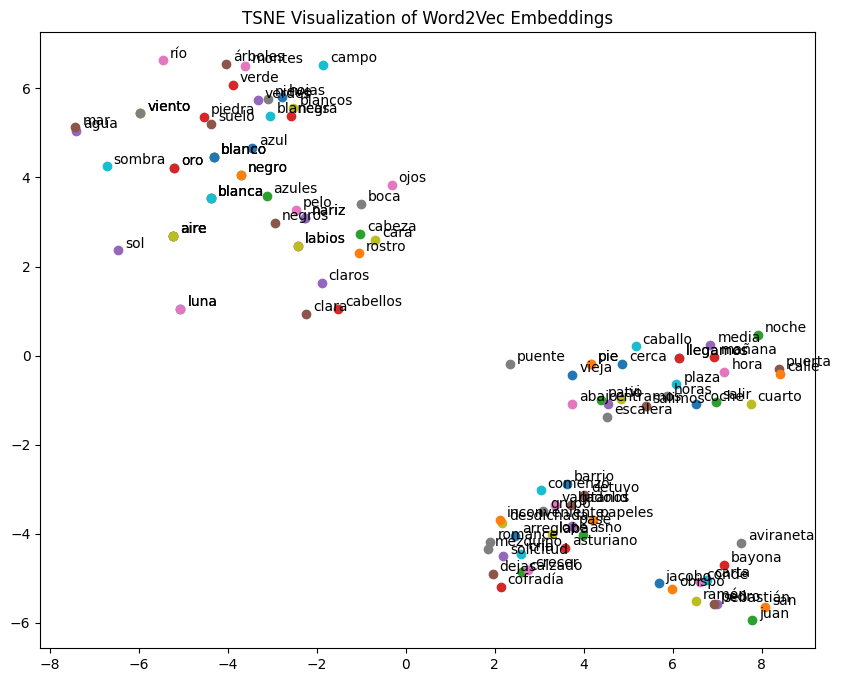

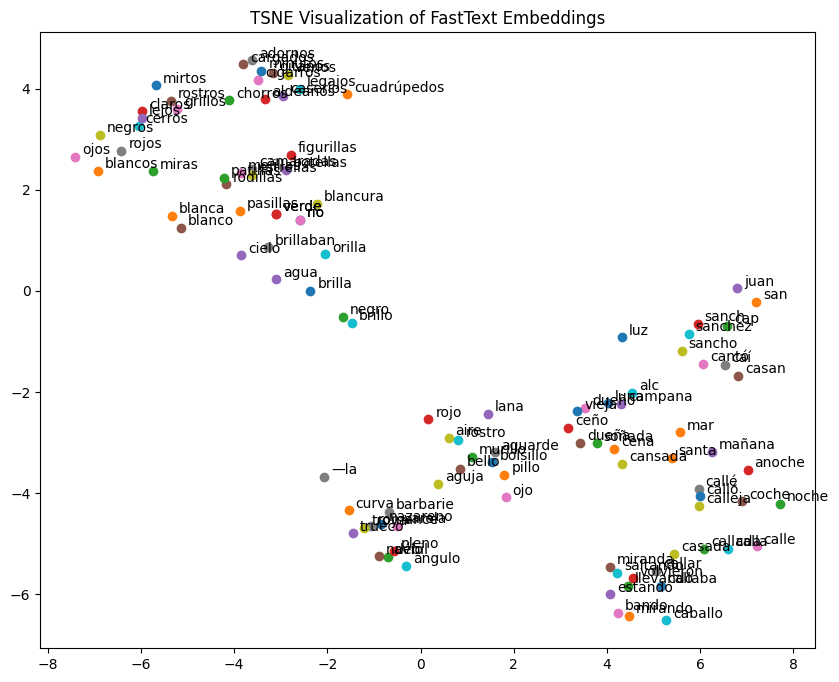

In [62]:
import spacy
from gensim.models import FastText, Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def visualize_embeddings(w2v_model, ft_model, most_common_lorca):

    for model_name, model in [("Word2Vec", w2v_model), ("FastText", ft_model)]:
        words = []
        vectors = []
        for word in most_common_lorca:
            words.append(word)
            vectors.append(model.wv[word])
            for similar_word, _ in model.wv.most_similar(word):
                words.append(similar_word)
                vectors.append(model.wv[similar_word])

        tsne = TSNE(n_components=2, random_state=0)
        vectors_2d = tsne.fit_transform(np.array(vectors))

        plt.figure(figsize=(10, 8))
        for i, label in enumerate(words):
            x, y = vectors_2d[i, :]
            plt.scatter(x, y)
            plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points')
        plt.title(f"TSNE Visualization of {model_name} Embeddings")
        plt.show()


visualize_embeddings(w2v_model, ft_model, most_common_lorca)